## In this notebook we will be learning some hands-on techniques for Outlier Detection in Machine Learning

## A few outlier detection techniques :

### **1. Percentile**

### **2. Using scatter/box plot**

### **3. Using 3 Standard Deviation**

### **4. Z test**

## Import the required libraries

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn scikit-image --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
#dependencies
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv') #reading the csv file
df.head()

In [ ]:
df.shape # in the format of (row,columns)

In [ ]:
# here we will be studying the price column from the data set
df.columns

## 1. Removing Outliers using Percentile

In [ ]:
#setting the limits or our criteria for an item to be called as an outlier
upper_bound=df['price'].quantile(0.9995) #value at 99.99 percentile
print('Upper bound:',upper_bound)

lower_bound=df['price'].quantile(0.0005) #value at 0.05 percentile
print('Lower bound:',lower_bound)

max_price=max(df['price'])
print('Max:', max_price)

min_price=min(df['price'])
print('Min:', min_price)

In [ ]:
print(f'Number of data points having Price greater than {upper_bound} :', len(df[df['price']>upper_bound]))

In [ ]:
print(f'Number of data points having Price lower than {lower_bound} :', len(df[df['price']<lower_bound]))

In [ ]:
df_percentile = df[(df['price']<upper_bound) & (df['price']>lower_bound)]

In [ ]:
df_percentile 

In [ ]:
df_percentile.shape

## 2. Scatter plot for outlier removal

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(df.index,df['price'],color='red')
plt.title('Price of accomodation')
plt.xlabel('indices')
plt.ylabel('Price')
plt.show()

In [ ]:
x_upper=list(df[df['price']>upper_bound].index)
y_upper=df[df['price']>upper_bound]

x_lower=list(df[df['price']<lower_bound+2500].index)
y_lower=df[df['price']<lower_bound+2500]

x_inlier=list(df[(df['price']<upper_bound) & (df['price']>lower_bound)].index)
y_inlier=df[(df['price']<upper_bound) & (df['price']>lower_bound)]

print(len(x_inlier))
print(len(y_inlier))

In [ ]:
plt.scatter(x_upper,y_upper['price'],color='black',marker='d',label='Above Upper Quartile')
plt.scatter(x_lower,y_lower['price'],color='red',label='Below Lower Quartile')
plt.scatter(x_inlier,y_inlier['price'],color='green',label='Inlier')
plt.title('Price of accomodation')
plt.xlabel('indices')
plt.ylabel('Price')
plt.legend(edgecolor='k')
plt.show();

## 3. **Standard Deviation** for identifying the outliers

**Formula** :

 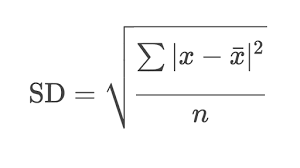

In [ ]:
#Dependency 
from scipy.stats import norm

In [ ]:
plt.hist(df.price, bins=10, rwidth=0.8, density=True)

rng = np.arange(df.price.min(), df.price.max(), 0.1)

plt.plot(rng, norm.pdf(rng, df.price.mean(), df.price.std()));

In [ ]:
df.describe()

In [ ]:
#setting limits for outliers 
#constraining by using 3 std dev technique
#one may take 2 std dev or even 4-5 std dev for the same , it totally depends on the type of the data being used

upper_limit = df.price.mean() + 3*(df.price.std())

print(upper_limit)

In [ ]:
lower_limit = df.price.mean() - 3*(df.price.std())

print(lower_limit)

In [ ]:
#seeing the outliers

outlier_df = df[(df.price > upper_limit) | (df.price < lower_limit)]
outlier_df.shape

In [ ]:
outlier_df.price.plot(kind='hist');

In [ ]:
inlier_df = df[(df['price'] > lower_limit) & (df['price'] < upper_limit)]
inlier_df.shape

In [ ]:
inlier_df.price.plot(kind='hist');

## **4. Z test for Outlier Removal**

**Formula**

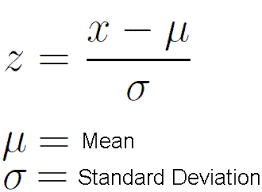

In [ ]:
df['zscore'] = ( df.price - df.price.mean() ) / df.price.std()

df.head(5)

In [ ]:
#the outliers

outlier_df = df[(df.zscore < -3) | (df.zscore > 3)]
outlier_df.shape

In [ ]:
outlier_df.price.plot(kind='hist');

In [ ]:
#outliers removed

df_inliers = df[(df.zscore > -3) & (df.zscore < 3)]

df_inliers.head()

In [ ]:
df_inliers.shape

In [ ]:
df_inliers.price.plot(kind='hist');